In [2]:
import cogsworth
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import gala.dynamics as gd

In [3]:
import sys
sys.path.append("../src")
import plotting

In [4]:
%config InlineBackend.figure_format = 'retina'

pd.options.display.max_columns = 999

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.9 * fs,
          'ytick.labelsize': 0.9 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)

# Load the population

In [6]:
%%time
m11h = cogsworth.pop.load("/mnt/home/twagg/ceph/pops/m11h-r-3-new-pot.h5")

CPU times: user 6.8 s, sys: 3.75 s, total: 10.5 s
Wall time: 19.5 s


In [8]:
%%time
m11h_half_Z = cogsworth.pop.load("/mnt/home/twagg/ceph/pops/m11h-r-3-Z-0.5-same-initC")

CPU times: user 7.17 s, sys: 3.65 s, total: 10.8 s
Wall time: 23.4 s


In [24]:
def total_sn(p):
    return p.sn_1_merger.sum() + p.sn_2_merger.sum() + p.sn_1.sum() + p.sn_2.sum() + p.sn_1_singles.sum() + p.sn_2_singles.sum()

In [29]:
total_sn(m11h_half_Z) / total_sn(m11h)

1.054436637749262

In [30]:
total_sn(m11h)

531168

In [7]:
m11h.final_bpp["tphys"].max()

349.9716573800415

In [8]:
m11h_half_Z.final_bpp["tphys"].max()

349.9716573800415

In [7]:
plotting.set_sn_subpop_masks(m11h);

12056 177097 114777 225314


In [10]:
plotting.set_sn_subpop_masks(m11h_half_Z);

12971 194027 121590 231495


In [11]:
def merger_sn_fraction(p):
    return (p.sn_1_merger.sum() + p.sn_2_merger.sum()) / (p.sn_1_merger.sum() + p.sn_2_merger.sum() + p.sn_1.sum() + p.sn_2.sum() + p.sn_1_singles.sum() + p.sn_2_singles.sum())

In [12]:
merger_sn_fraction(m11h)

0.4263453370684981

In [13]:
(m11h.bpp["evol_type"]==6).sum()

162208

In [14]:
(m11h_half_Z.bpp["evol_type"]==6).sum()

139488

In [15]:
(m11h.final_bpp['sep'] == 0.0).sum()

421831

In [16]:
(m11h_half_Z.final_bpp['sep'] == 0.0).sum()

419542

In [8]:
f = np.load(f"/mnt/home/twagg/ceph/pops/sn_positions-m11h-r-3-new-pot.npz")
m11h.primary_sn_distances, m11h.secondary_sn_distances = f["arr_0"] * u.kpc, f["arr_1"] * u.kpc

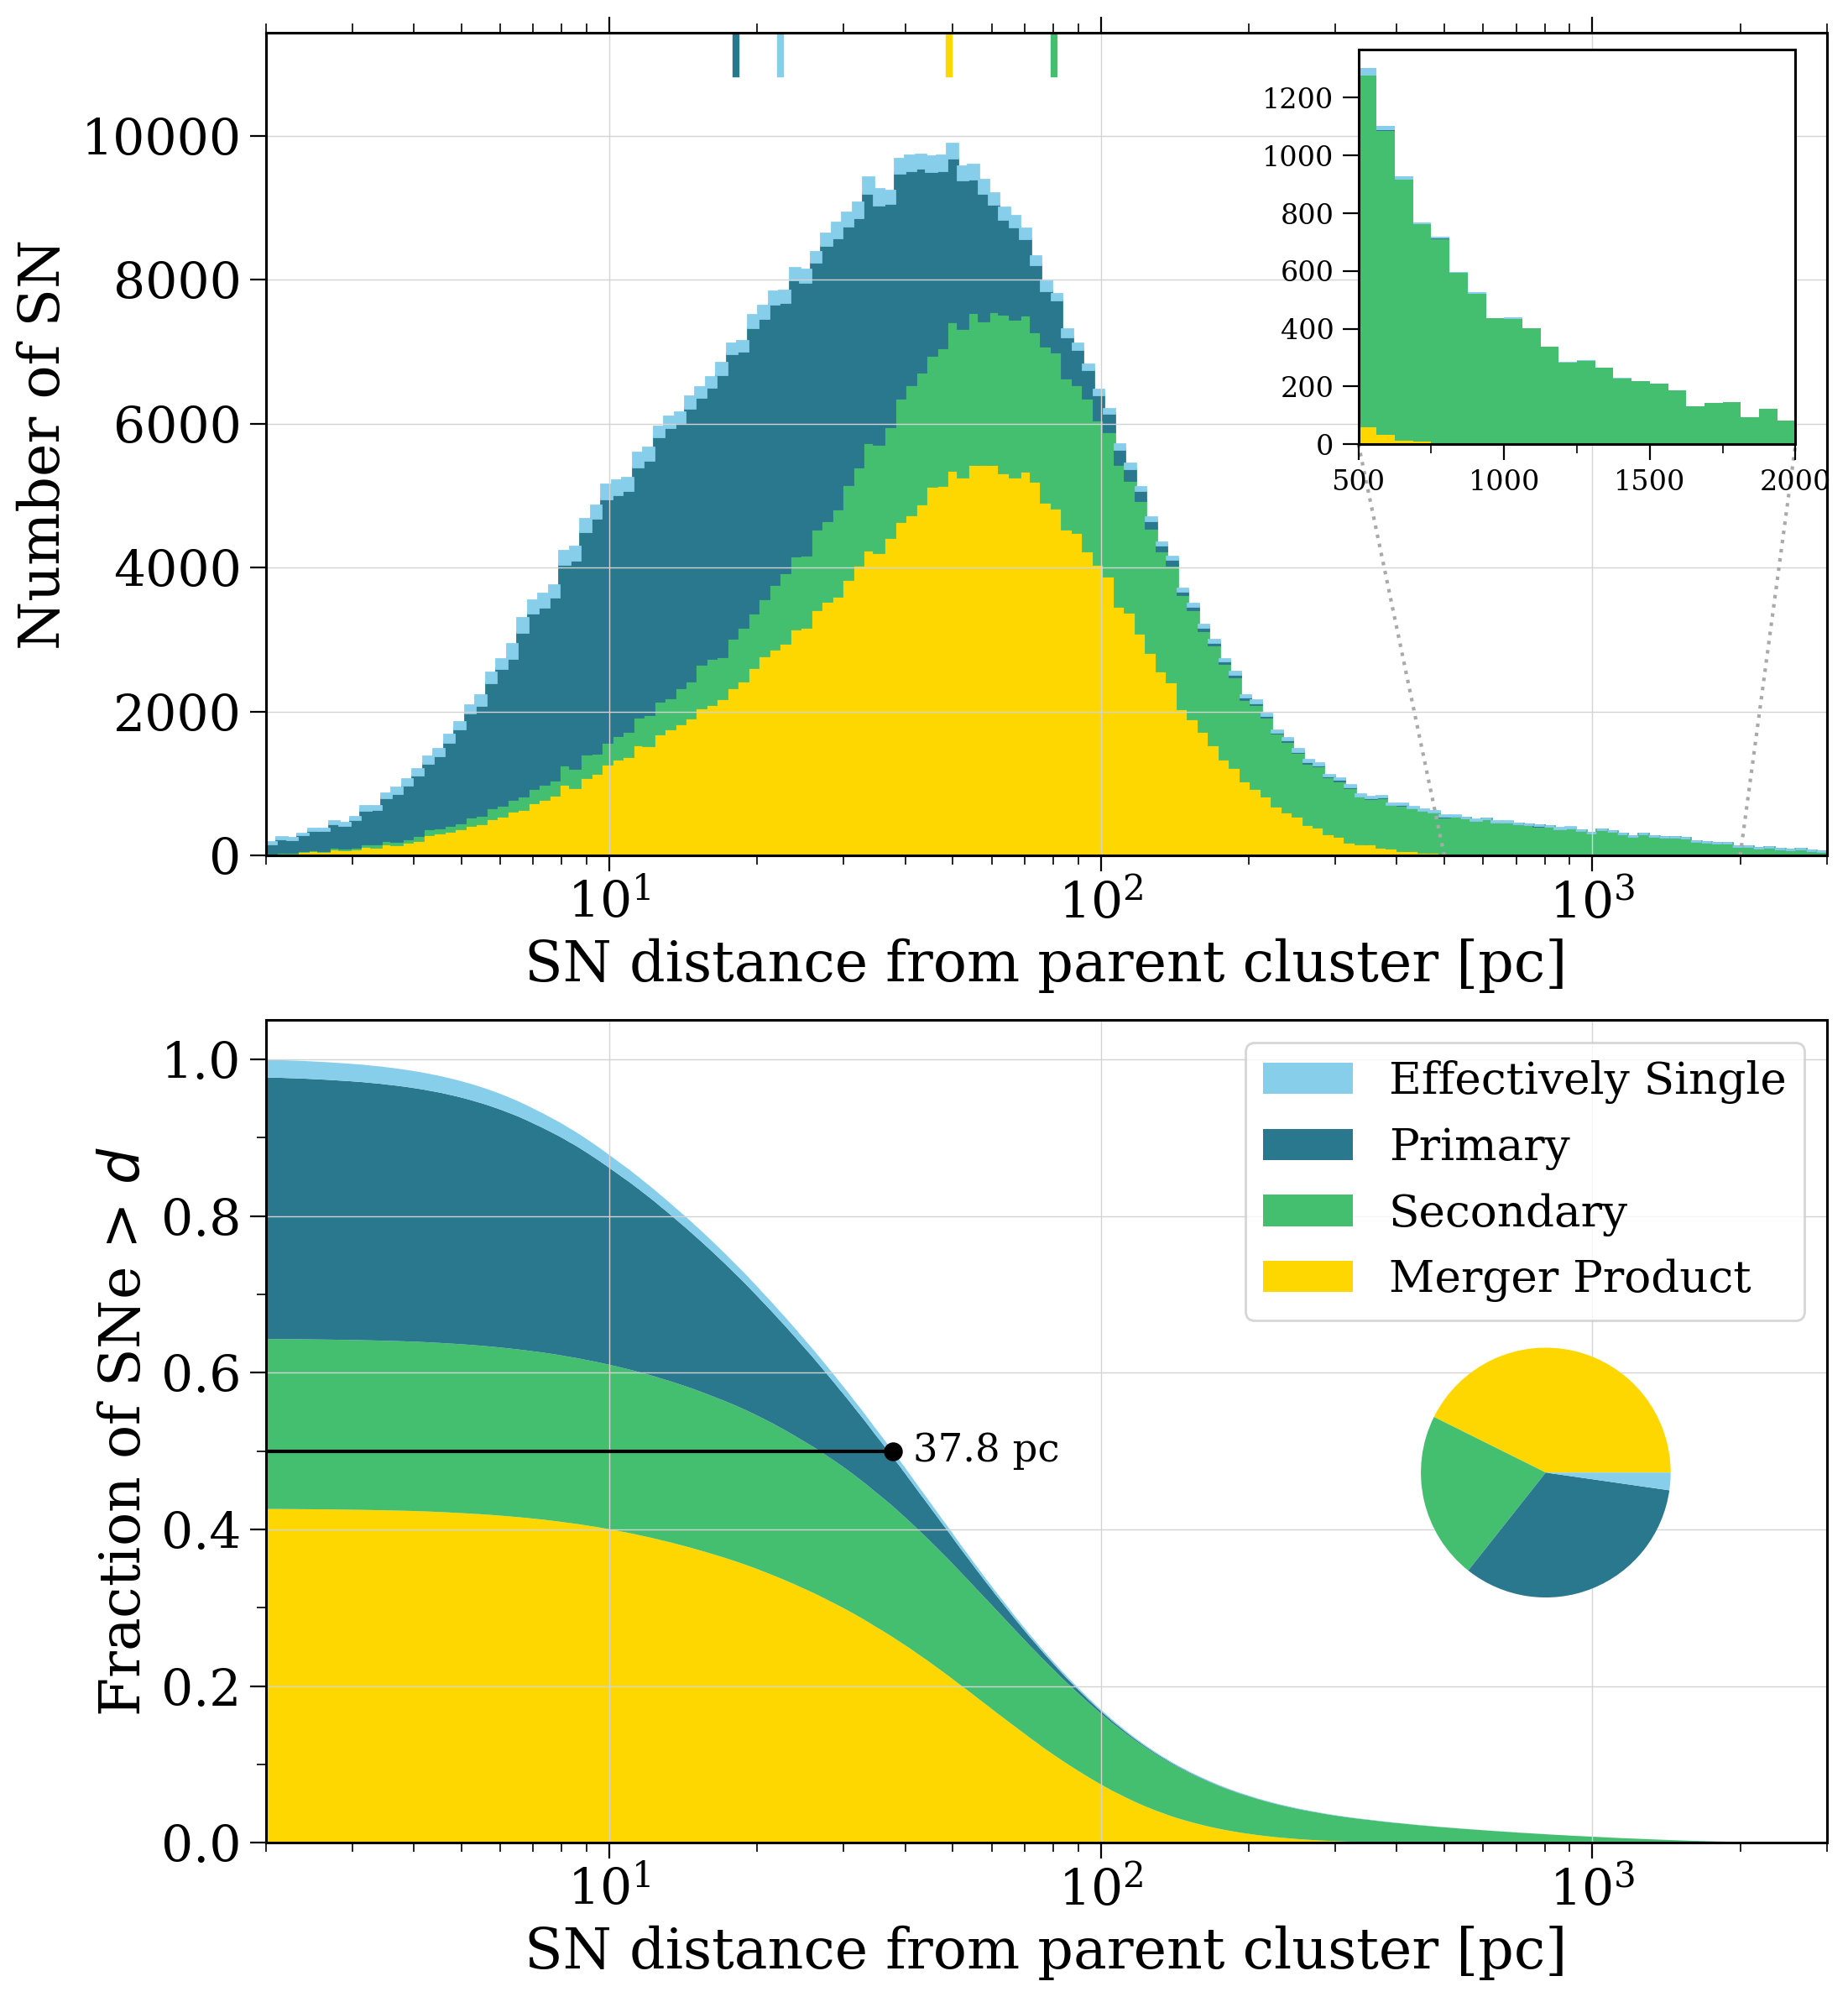

In [37]:
fig, axes = plotting.sandpile(m11h, bins=np.geomspace(2e0, 3e3, 150), show=False)
plt.savefig("../plots/sn_distance_hists/m11h-r-3-new-pot-new-style.pdf", format="pdf", bbox_inches="tight", dpi=300)
plt.show()

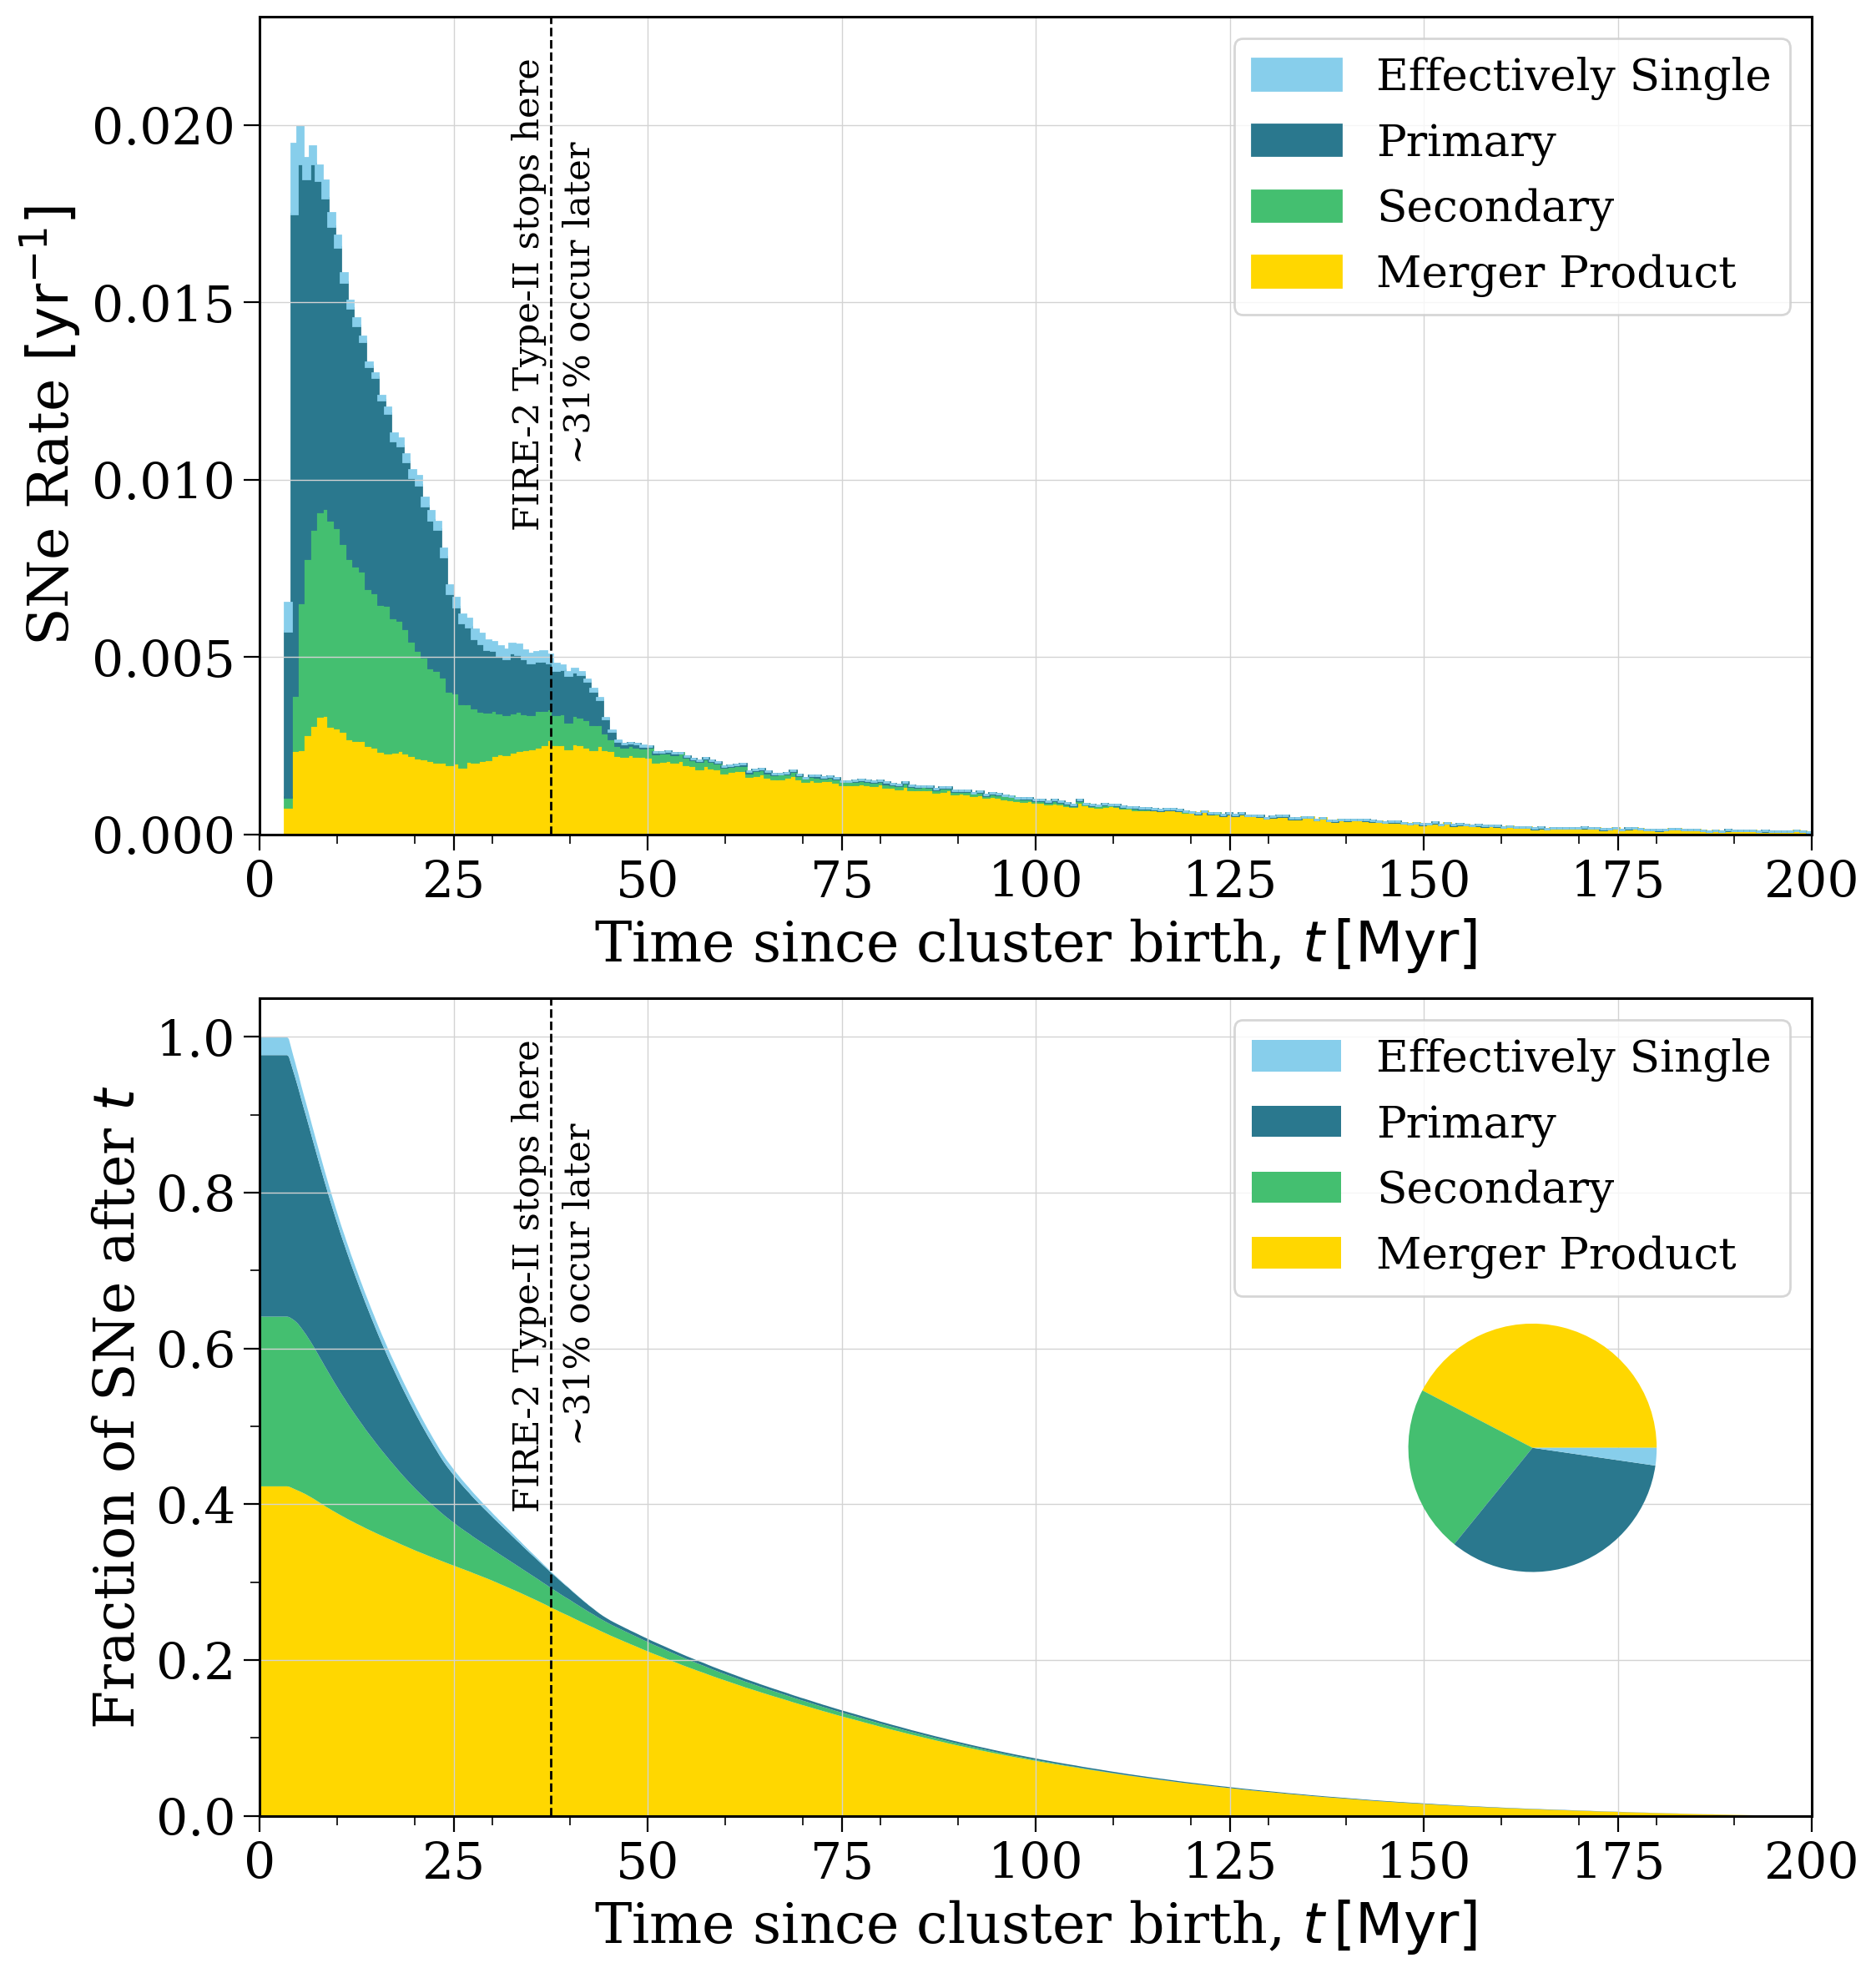

In [36]:
reload(plotting)
fig, axes = plotting.sandpile(m11h, bins=np.linspace(0, 200, 250), show=False, var="time")
plt.savefig("../plots/m11h-r-3-new-pot-time.pdf", format="pdf", bbox_inches="tight", dpi=300)
plt.show()

# Compare mergers across metallicity

## Which things merge?

In [17]:
mergers = {
    "regular": m11h.bpp["bin_num"][m11h.bpp["evol_type"]==6].values,
    "half": m11h_half_Z.bpp["bin_num"][m11h_half_Z.bpp["evol_type"]==6].values,
}

In [18]:
len(mergers["regular"]), len(mergers["half"])

(162208, 139488)

In [19]:
merge_in_both = np.intersect1d(mergers["regular"], mergers["half"])

In [20]:
m11h.sn_1_merger.sum() + m11h.sn_2_merger.sum()

226461

In [21]:
mergers["half"]

array([     3,     21,     24, ..., 778159, 778169, 778171])

## **WHEN** do they merge?

In [2]:
from importlib import reload

0.9999999999999999


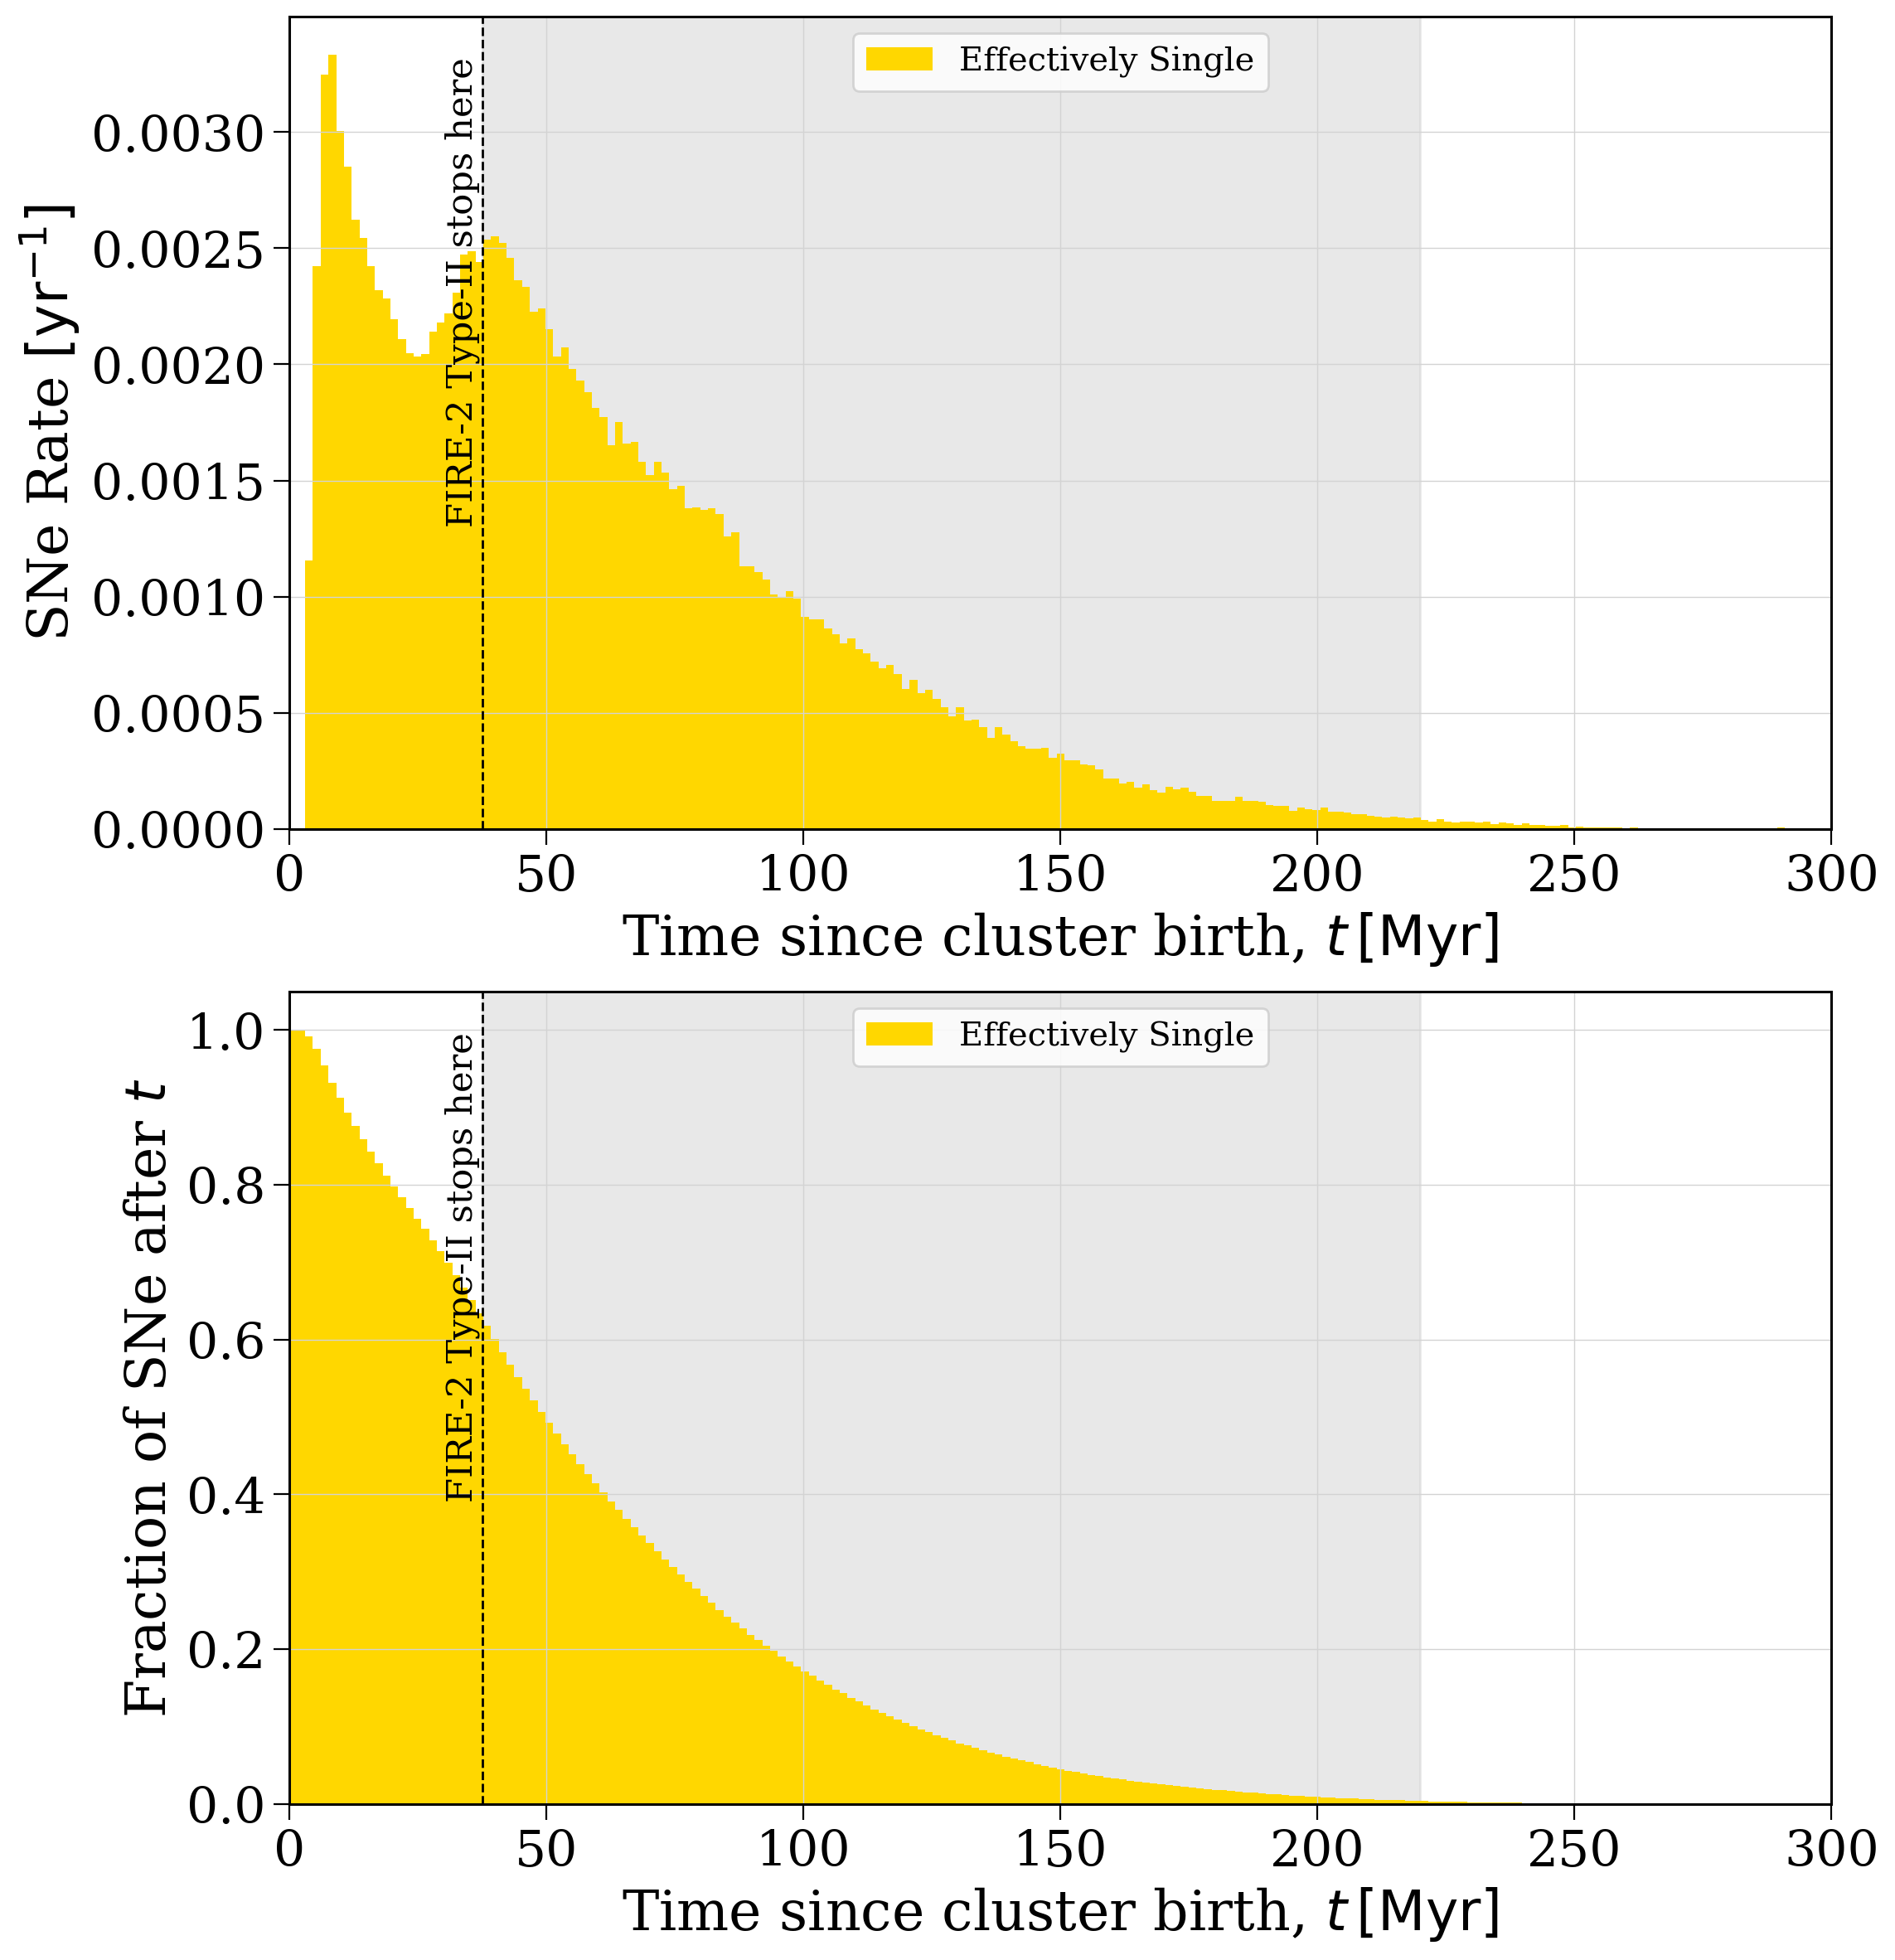

In [22]:
reload(plotting)
fig, axes = plotting.sn_time_histograms(m11h, bins=np.linspace(0, 300, 200), show=False)

for ax in axes:
    ax.set(xlim=(0, 300))

1.0


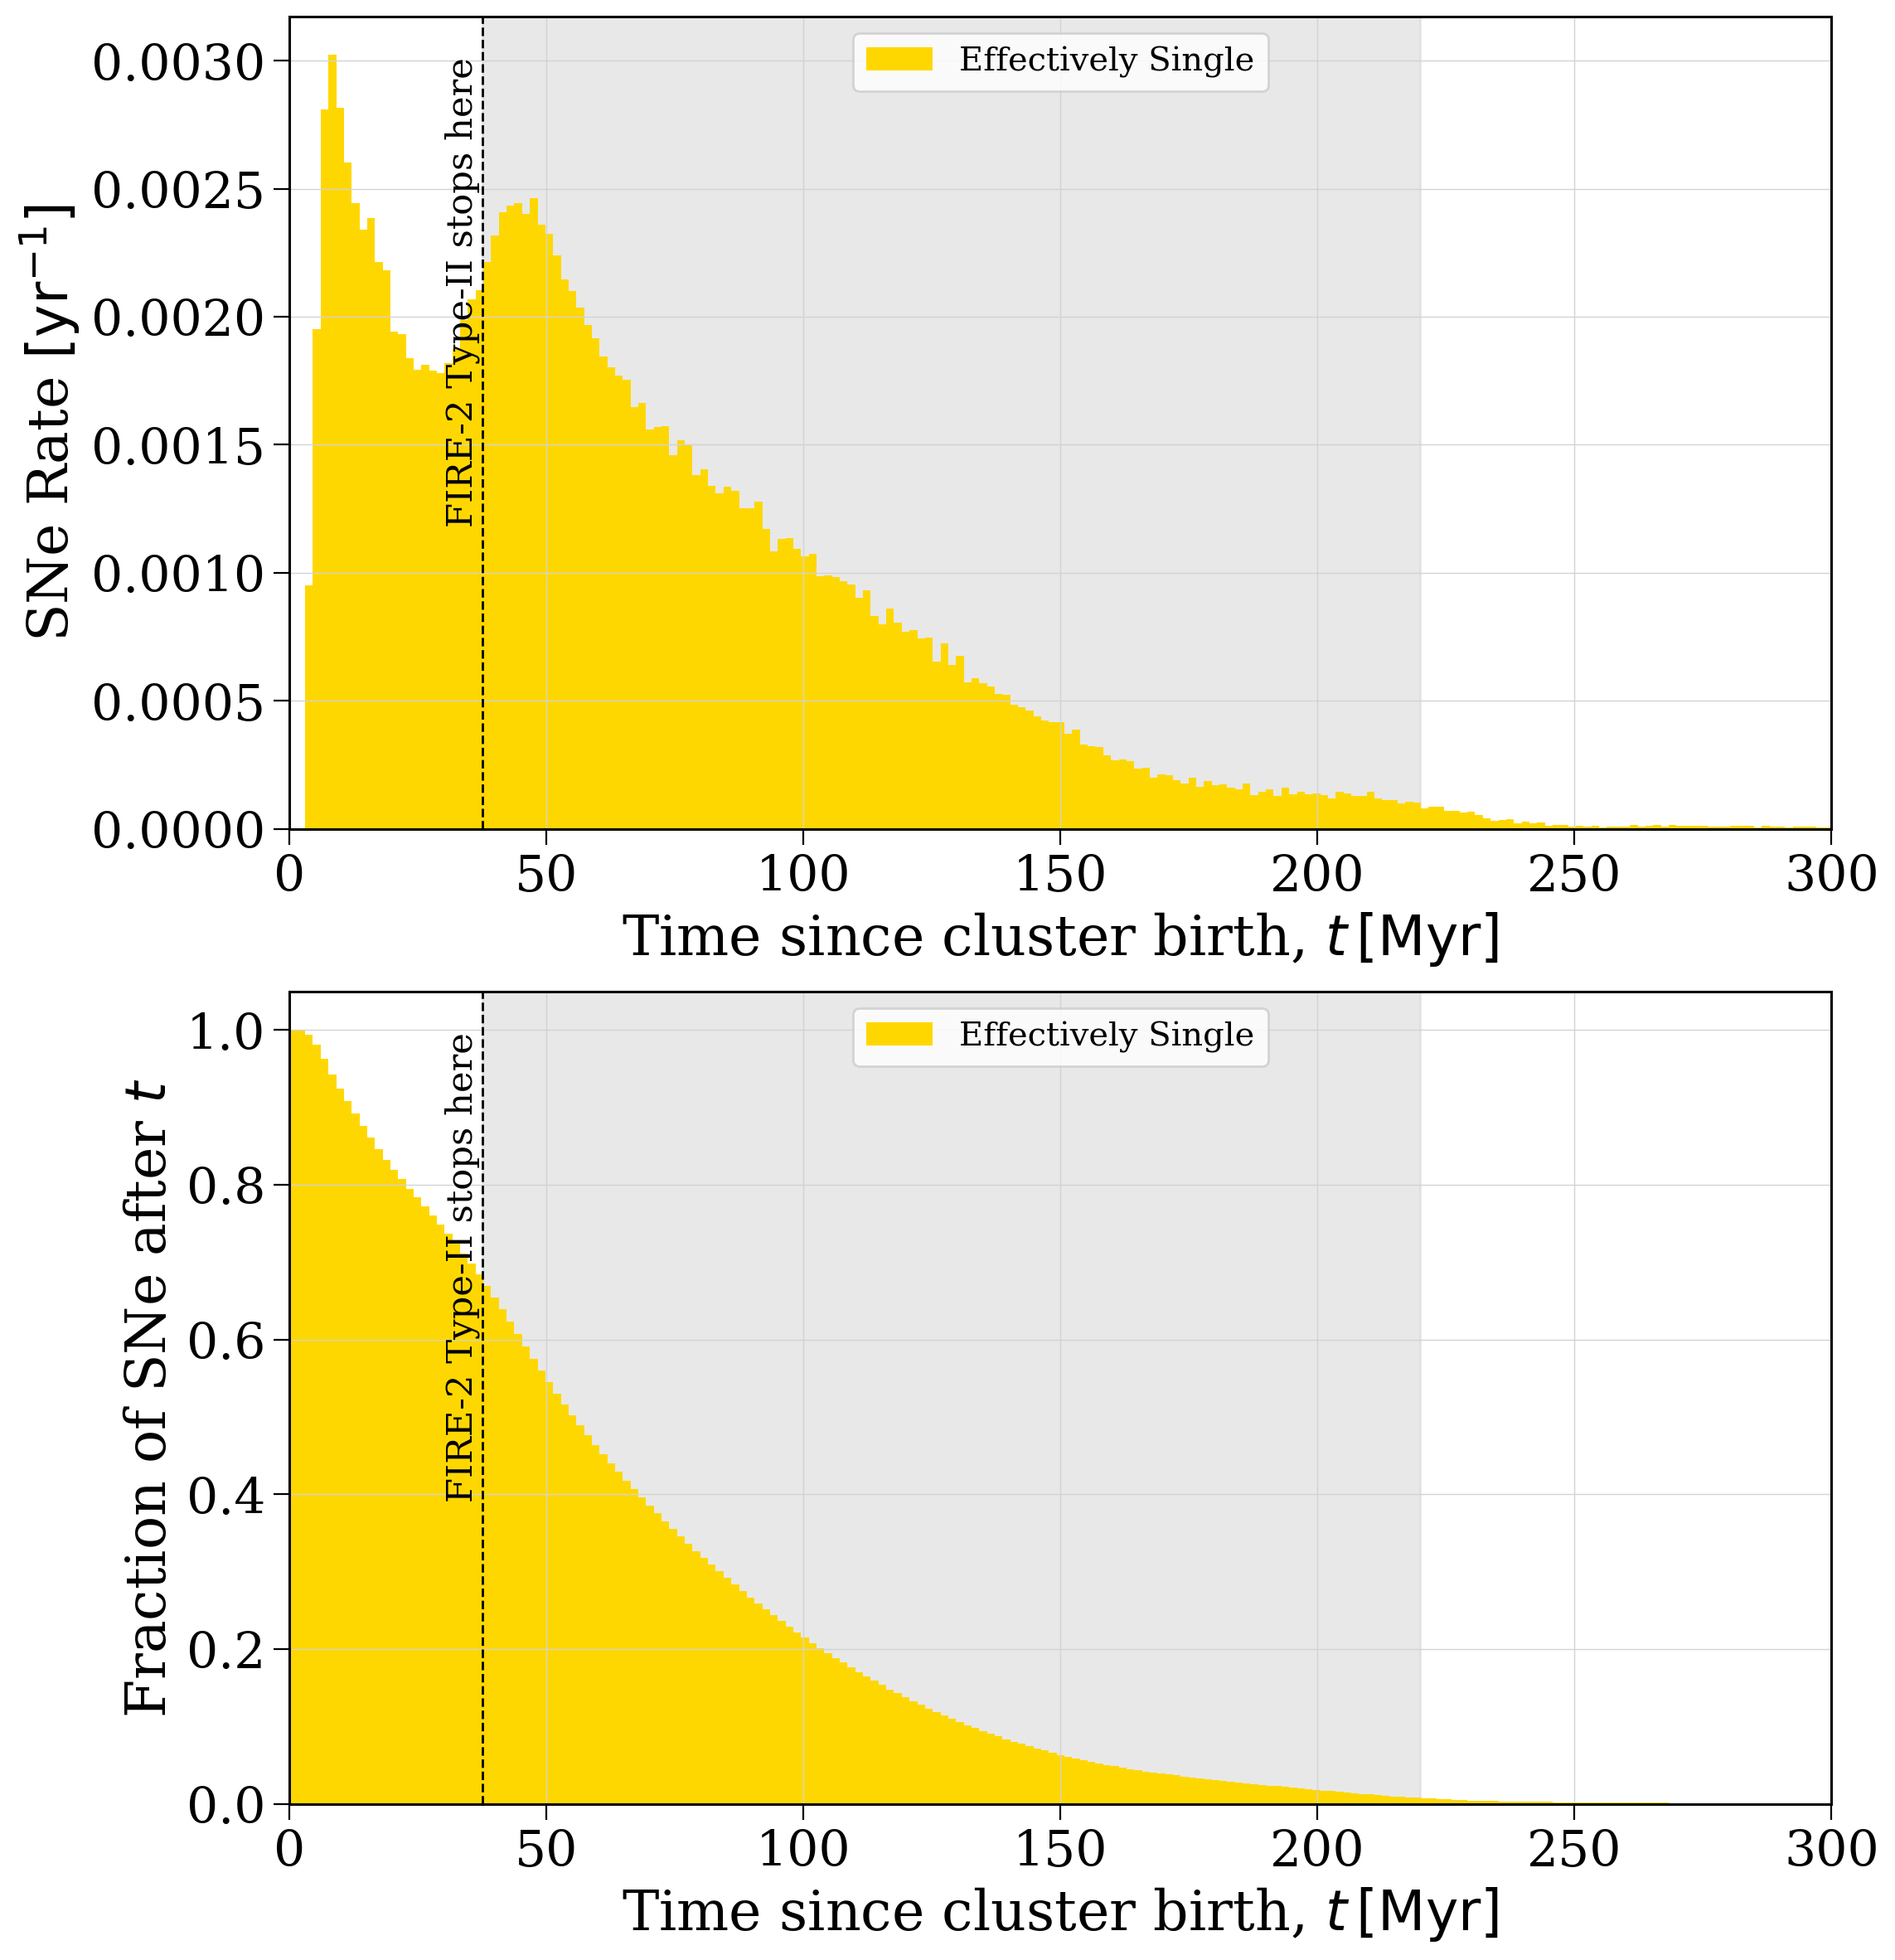

In [20]:
reload(plotting)
fig, axes = plotting.sn_time_histograms(m11h_half_Z, bins=np.linspace(0, 300, 200), show=False)

for ax in axes:
    ax.set(xlim=(0, 300))

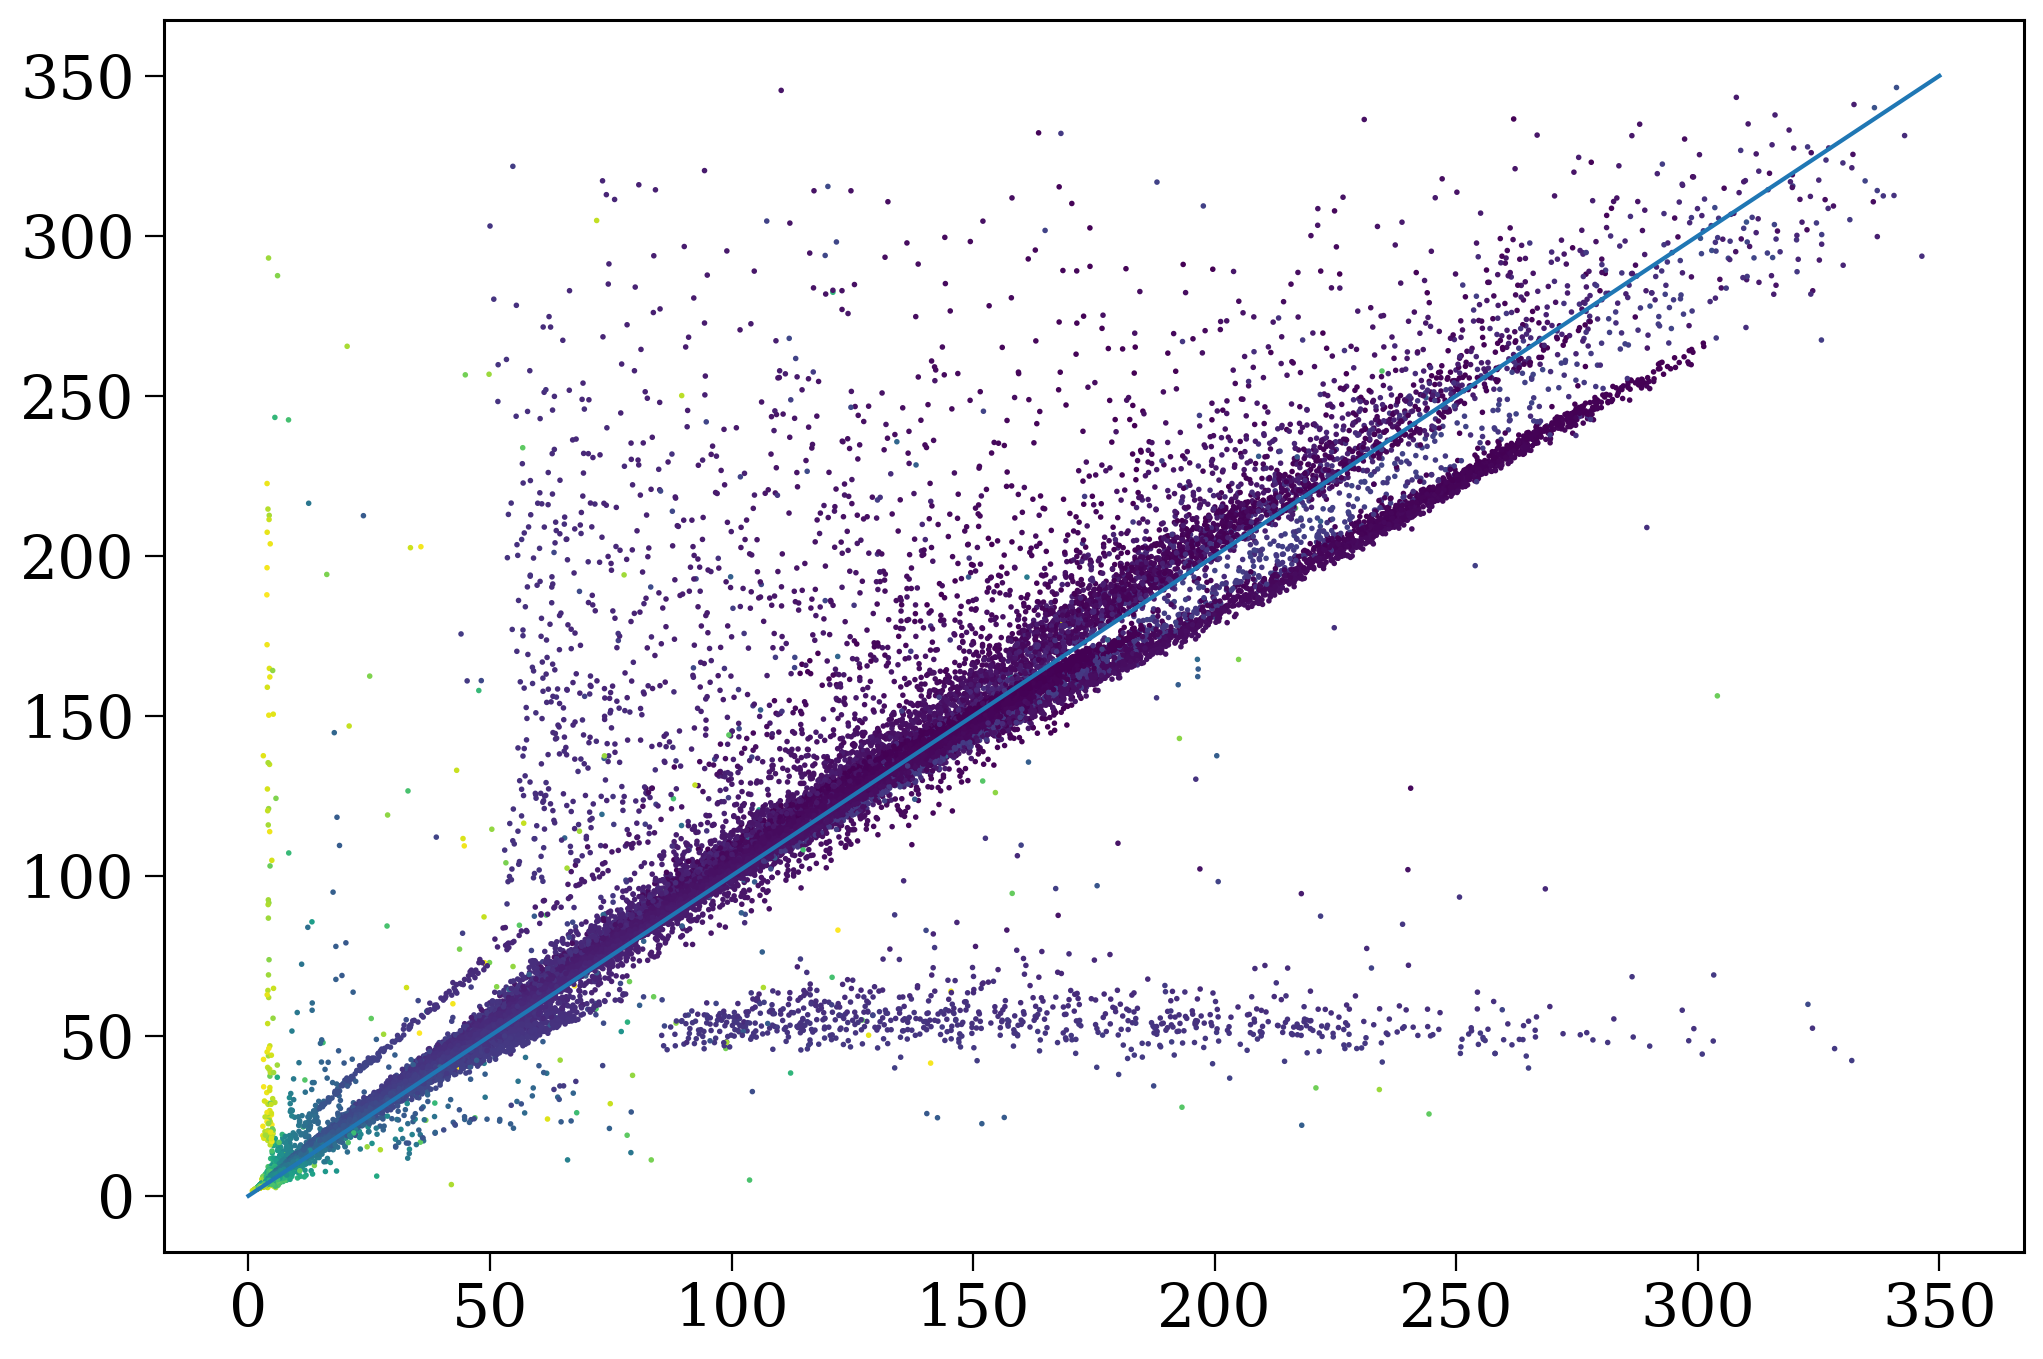

In [80]:
plt.scatter(m11h.bpp[m11h.bpp["evol_type"] == 6].loc[merge_in_both]["tphys"],
            m11h_half_Z.bpp[m11h_half_Z.bpp["evol_type"] == 6].loc[merge_in_both]["tphys"], s=1,
            c=np.log10(m11h.initC["mass_1"].loc[merge_in_both]))
plt.plot([0, 350], [0, 350])

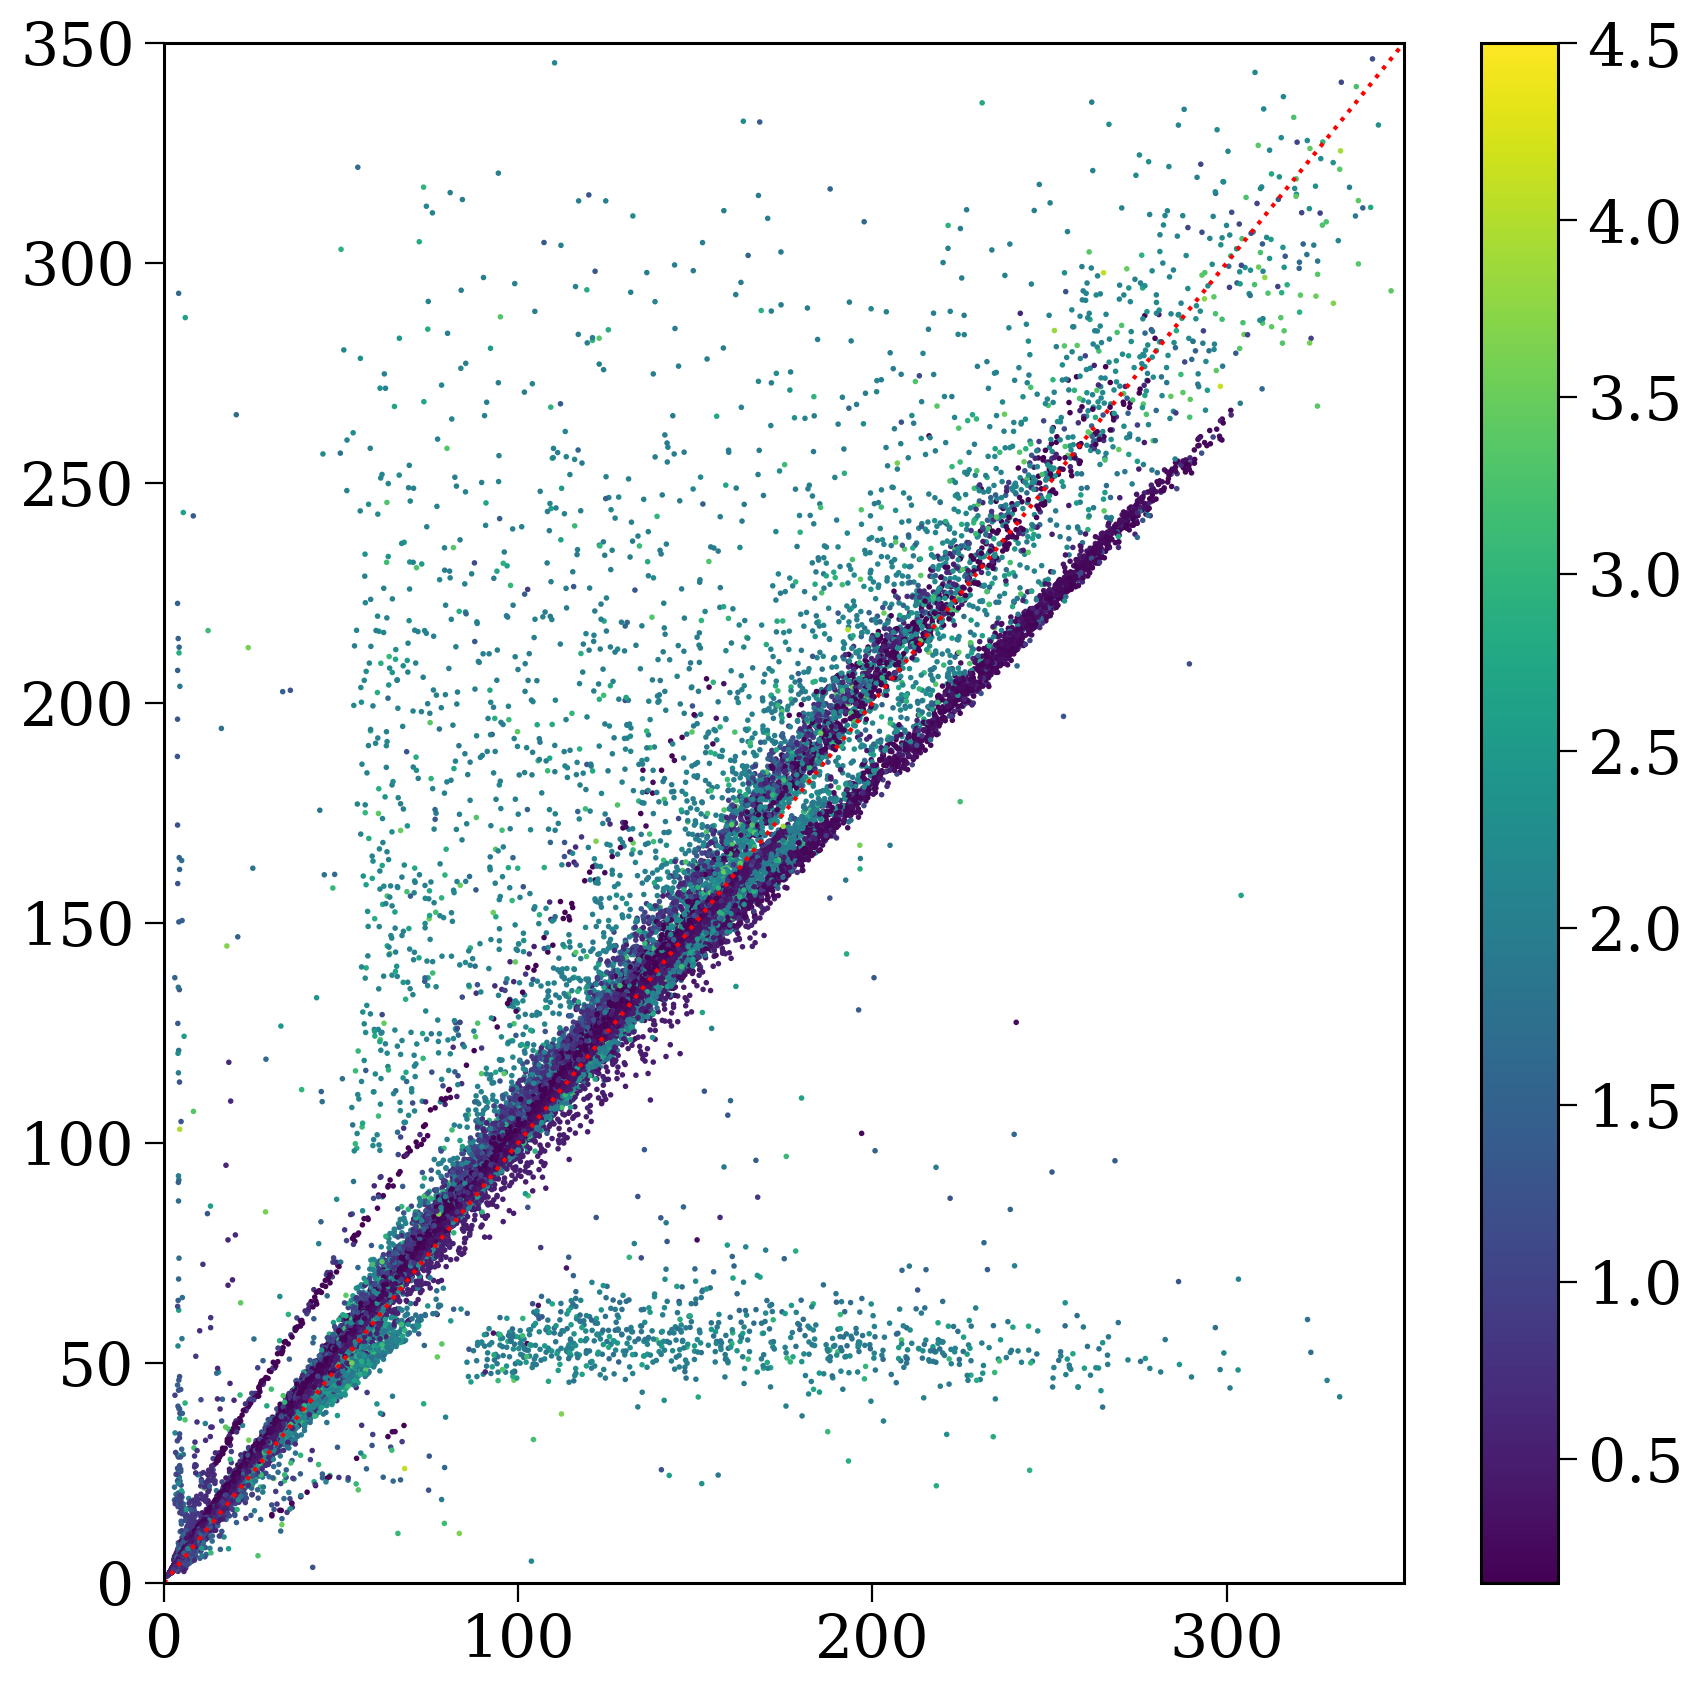

In [86]:
fig, ax = plt.subplots(figsize=(10, 10))

scatter = ax.scatter(m11h.bpp[m11h.bpp["evol_type"] == 6].loc[merge_in_both]["tphys"],
            m11h_half_Z.bpp[m11h_half_Z.bpp["evol_type"] == 6].loc[merge_in_both]["tphys"], s=1,
            c=np.log10(m11h.initC["porb"].loc[merge_in_both]))
fig.colorbar(scatter)

ax.plot([0, 350], [0, 350], color="red", linestyle="dotted")

ax.set(xlim=(0, 350), ylim=(0, 350))

plt.show()

# More

In [25]:
import h5py as h5

In [33]:
with h5.File("/mnt/home/twagg/ceph/pops/m11h-r-3-new-pot.h5", "a") as f:
    f["initial_galaxy"].attrs["params"] = f["initial_galaxy"].attrs["params"].replace("Galaxy", "StarFormationHistory")

In [34]:
%%time
m11h = cogsworth.pop.load("/mnt/home/twagg/ceph/pops/m11h-r-3-new-pot.h5")

CPU times: user 6.87 s, sys: 3.08 s, total: 9.95 s
Wall time: 21.4 s


In [35]:
f = np.load("/mnt/home/twagg/ceph/pops/sn_positions-m11h-r-3-new-pot.npz")
m11h.primary_sn_distances, m11h.secondary_sn_distances = f["arr_0"] * u.kpc, f["arr_1"] * u.kpc

In [36]:
plotting.set_sn_subpop_masks(m11h);

12056 177097 114777 225314


In [1]:
fig, axes = plotting.sn_distance_histograms(m11h, show=False)
axes[0].set_ylim(top=4400)
# plt.savefig("../plots/sn_distance_hists/m11h-r-3-new-pot.pdf", format="pdf", bbox_inches="tight", dpi=300)
plt.show()

NameError: name 'plotting' is not defined

# Comparisons for Mathieu

In [33]:
merger_nums = m11h.bin_nums[m11h.final_bpp["sep"] == 0]

In [34]:
m11h.bpp[(m11h.bpp["evol_type"] == 6) & (m11h.bpp["kstar_1"] < 13) & (m11h.bpp["kstar_1"] < 14)]["bin_num"].values

array([     3,     19,     64, ..., 778124, 778127, 778146])

In [35]:
len(np.intersect1d(m11h.bin_nums[m11h.final_bpp["sep"] == 0],
                   m11h.bpp[(m11h.bpp["evol_type"] == 6) & (m11h.bpp["kstar_1"] < 13) & (m11h.bpp["kstar_1"] < 14)]["bin_num"].values))

52862

In [36]:
m11h.bpp.loc[20]

,tphys,mass_1,mass_2,kstar_1,kstar_2,sep,porb,ecc,RRLO_1,RRLO_2,evol_type,aj_1,aj_2,tms_1,tms_2,massc_1,massc_2,rad_1,rad_2,mass0_1,mass0_2,lum_1,lum_2,teff_1,teff_2,radc_1,radc_2,menv_1,menv_2,renv_1,renv_2,omega_spin_1,omega_spin_2,B_1,B_2,bacc_1,bacc_2,tacc_1,tacc_2,epoch_1,epoch_2,bhspin_1,bhspin_2,bin_num
20,0.000000,35.877147,30.959054,1.0,1.0,50.485159,5.085245,0.229129,0.572014,0.556541,1.0,0.000000,0.000000,5.058972e+00,5.642230e+00,0.000000,0.000000,8.720845,7.932231,35.877147,30.959054,1.791516e+05,1.282428e+05,40392.012437,38956.520090,0.000000,0.000000,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.177683e+03,1.301543e+03,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,20
20,4.351817,33.101371,29.407627,1.0,1.0,48.817673,4.999960,0.000000,1.000628,0.808984,3.0,4.497814,4.457550,5.358888e+00,5.883862e+00,0.000000,0.000000,19.012019,14.561891,33.101371,29.407627,2.901818e+05,2.055078e+05,30861.925955,32349.516920,0.000000,0.000000,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,4.589778e+02,4.589778e+02,0.000000e+00,0.0,0.0,0.0,0.0,0.0,-0.145997,-0.105734,0.0,0.0,20
20,5.231180,29.675138,31.610522,2.0,1.0,48.482130,4.997643,0.000000,1.306543,0.968517,2.0,5.839683,4.634303,5.839683e+00,5.550445e+00,9.354097,0.000000,23.656689,18.049897,29.675138,31.610522,3.010815e+05,2.613086e+05,27923.101624,30854.653859,0.898925,0.000000,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,6.669041e+02,4.611812e+02,0.000000e+00,0.0,0.0,0.0,0.0,0.0,-0.608503,0.596877,0.0,0.0,20
20,5.239216,20.990970,40.281109,4.0,1.0,53.135742,5.734836,0.000000,90.049839,0.696675,2.0,5.847719,3.081426,5.839683e+00,4.694410e+00,9.541230,0.000000,1550.936487,16.151943,29.675138,40.281109,2.989972e+05,3.697119e+05,3442.622330,35573.212751,0.909979,0.000000,6.391593e+00,1.000000e-10,1.339808e+03,1.000000e-10,2.707897e+02,1.928579e+03,0.000000e+00,0.0,0.0,0.0,0.0,0.0,-0.608503,2.157790,0.0,0.0,20
20,5.241407,9.594103,51.671969,4.0,1.0,141.807727,25.004143,0.000000,0.659637,0.221606,4.0,5.849909,2.107634,5.839683e+00,4.114205e+00,9.549847,0.000000,23.068553,16.565035,29.675138,51.671969,2.878083e+05,5.409176e+05,27959.877253,38632.801956,0.911067,0.000000,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.072609e+01,2.108567e+03,0.000000e+00,0.0,0.0,0.0,0.0,0.0,-0.608503,3.133773,0.0,0.0,20
20,5.249856,9.583076,51.656557,7.0,1.0,141.824043,25.013857,0.000000,0.026175,0.221990,2.0,0.011180,2.116371,6.647459e-01,4.114767e+00,0.000000,0.000000,0.915260,16.597956,9.583076,51.656557,1.276520e+05,5.414898e+05,114552.447684,38604.673845,0.000000,0.000000,9.583076e+00,1.000000e-10,9.152595e-01,1.000000e-10,4.735125e+00,2.092168e+03,0.000000e+00,0.0,0.0,0.0,0.0,0.0,5.238676,3.133485,0.0,0.0,20
20,5.996571,6.647494,49.488605,8.0,1.0,154.614184,29.738910,0.000000,0.020896,0.236565,2.0,0.883799,2.913888,8.837986e-01,4.198433e+00,4.286695,0.000000,0.727306,20.274854,6.647494,49.488605,1.017954e+05,5.793696e+05,121434.772624,35524.638594,0.000070,0.000000,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,9.566337e+00,9.900376e+02,0.000000e+00,0.0,0.0,0.0,0.0,0.0,5.112772,3.082684,0.0,0.0,20
20,6.043653,6.413189,49.350610,8.0,1.0,155.627648,30.131872,0.000000,0.020896,0.236565,15.0,0.930830,2.964871,8.837986e-01,4.204083e+00,4.787794,0.000000,1.250225,20.604519,6.647494,49.350610,1.769263e+05,5.819766e+05,106346.591525,35278.877035,0.000070,0.000000,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,6.787550e+09,9.368554e+02,0.000000e+00,0.0,0.0,0.0,0.0,0.0,5.112772,3.078727,0.0,0.0,20
20,6.043653,2.351865,49.350610,13.0,1.0,-1.000000,-1.000000,-1.000000,0.000000,-2.000000,11.0,0.930830,2.964871,8.837986e-01,4.204083e+00,4.787794,0.000000,1.250225,20.604519,6.647494,49.350610,1.769263e+05,5.819766e+05,106346.591525,35278.877035,0.000070,0.000000,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,6.787550e+09,9.368554e+02,0.000000e+00,0.0,0.0,0.0,0.0,0.0,6.043653,3.078727,0.0,0.0,20
20,7.307456,2.351865,43.600694,13.0,2.0,-1.000000,-1.000000,

In [37]:
def identify_stellar_mergers(p):
    p.bpp["row_ind"] = np.arange(len(p.bpp))
    zero_sep_rows = p.bpp[p.bpp["sep"] == 0].drop_duplicates(subset="bin_num", keep="first")
    just_before_merger = p.bpp.iloc[zero_sep_rows["row_ind"] - 1]
    return just_before_merger[(just_before_merger["kstar_1"] < 13) & (just_before_merger["kstar_2"] < 13)]["bin_num"].values

In [71]:
p = m11h

In [72]:
p.bpp["row_ind"] = np.arange(len(p.bpp))
zero_sep_rows = p.bpp[p.bpp["sep"] == 0].drop_duplicates(subset="bin_num", keep="first")
just_before_merger = p.bpp.iloc[zero_sep_rows["row_ind"] - 1]

In [74]:
just_before_merger

,tphys,mass_1,mass_2,kstar_1,kstar_2,sep,porb,ecc,RRLO_1,RRLO_2,evol_type,aj_1,aj_2,tms_1,tms_2,massc_1,massc_2,rad_1,rad_2,mass0_1,mass0_2,lum_1,lum_2,teff_1,teff_2,radc_1,radc_2,menv_1,menv_2,renv_1,renv_2,omega_spin_1,omega_spin_2,B_1,B_2,bacc_1,bacc_2,tacc_1,tacc_2,epoch_1,epoch_2,bhspin_1,bhspin_2,bin_num,row_ind
1,87.523216,0.885136,8.555384,11.0,2.0,155.915573,73.435903,0.0,0.000287,1.000652,7.0,15.776749,32.556523,1.000000e+10,32.479903,0.885136,1.772622,0.009345,89.783459,0.885132,8.555384,0.070706,6383.958693,30927.569848,5469.453839,0.009345,0.308679,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,31.249981,31.249981,0.0,0.0,0.0,0.0,0.0,0.0,71.746467,54.966693,0.0,0.0,1,30
6,86.733980,0.881006,9.379346,11.0,2.0,186.315730,92.016414,0.0,0.000248,1.001228,7.0,4.681858,27.314985,1.000000e+10,27.253505,0.881006,2.007555,0.009391,108.773602,0.881002,9.379346,0.290000,8550.550846,43904.262306,5345.722106,0.009391,0.335982,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,24.939796,24.939796,0.0,0.0,0.0,0.0,0.0,0.0,82.052122,59.418995,0.0,0.0,6,99
7,117.618894,4.755373,2.974381,3.0,1.0,103.202472,43.704329,0.0,1.004496,0.066328,7.0,117.846971,117.616690,1.173473e+02,387.526072,0.803759,0.000000,43.550454,2.321257,4.755373,2.974381,704.109644,89.294311,4525.674774,11698.061774,0.172313,0.000000,1.975808e+00,1.000000e-10,2.819580e+01,1.000000e-10,39.381942,52.522442,0.0,0.0,0.0,0.0,0.0,0.0,-0.228077,0.002205,0.0,0.0,7,108
9,75.469534,0.895223,10.303265,11.0,2.0,185.269497,87.337015,0.0,0.000251,1.001421,7.0,1.483209,23.005939,1.000000e+10,22.960029,0.895223,2.276982,0.009232,109.309060,0.895219,10.303265,1.085974,11877.071592,61600.186431,5789.204270,0.009232,0.365635,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,26.276037,26.276037,0.0,0.0,0.0,0.0,0.0,0.0,73.986325,52.463595,0.0,0.0,9,138
11,40.531737,1.619517,7.615063,7.0,2.0,21.666866,3.846429,0.0,0.063034,1.000382,7.0,4.844574,41.007576,7.109455e+00,40.991440,0.000000,1.493714,0.349695,11.172562,1.619517,7.615063,2018.238728,6495.839005,65715.549948,15572.273864,0.000000,0.274101,1.619517e+00,1.000000e-10,3.496948e-01,1.000000e-10,596.623646,596.623646,0.0,0.0,0.0,0.0,0.0,0.0,35.687163,-0.475839,0.0,0.0,11,168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776960,166.988798,0.728463,7.429086,7.0,2.0,142.258917,68.851207,0.0,0.006724,1.000037,7.0,28.339777,42.923156,4.693917e+01,42.807101,0.000000,1.466113,0.196671,82.473334,0.728463,7.429086,123.293896,3751.736053,43564.681632,4996.557671,0.000000,0.270529,7.284634e-01,1.939995e-05,1.966713e-01,2.698621e+00,33.330870,33.330870,0.0,0.0,0.0,0.0,0.0,0.0,138.649021,124.065642,0.0,0.0,776960,10731673
776961,43.552015,7.271231,3.023227,1.0,1.0,20.144492,3.265915,0.0,1.001942,0.350007,3.0,44.027056,43.547933,4.478923e+01,377.666507,0.000000,0.000000,9.212407,2.158143,7.271231,3.023227,4744.197881,83.867678,15853.448491,11943.405190,0.000000,0.000000,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,702.673100,702.673100,0.0,0.0,0.0,0.0,0.0,0.0,-0.475042,0.004082,0.0,0.0,776961,10731680
776963,79.302540,5.606332,1.901801,3.0,1.0,102.896175,44.147389,0.0,1.340203,0.055187,7.0,79.833345,77.128737,7.953456e+01,1392.427068,1.006426,0.000000,65.436142,1.648557,5.614231,1.901801,1270.359026,12.590400,4279.000986,8506.041605,0.205620,0.000000,2.299953e+00,1.000000e-10,4.239984e+01,1.000000e-10,38.952150,1261.283849,0.0,0.0,0.0,0.0,0.0,0.0,-0.530805,2.173804,0.0,0.0,776963,10731705
776964,100.759372,5.269319,0.937962,5.0,1.0,755.112497,965.248031,0.0,1.001985,0.004515,7.0,101.087747,100.560520,8.754557e+01,14849.806606,1.289731,0.000000,401.547029,0.830895,5.388083,0.937962,15881.199932,0.477117,3248.046446,5286.309346,100.502368,0.000000,3.979588e+00,3.975650e-02,3.010447e+02,2.307604e-01,2.377493,2.377493,0.0,0.0,0.0,0.0,0.0,0.0,-0.328375,0.198852,0.0,0.0,776964,10731718


In [67]:
len(identify_stellar_mergers(m11h))

422371

In [60]:
m11h.bpp.loc[7]

,tphys,mass_1,mass_2,kstar_1,kstar_2,sep,porb,ecc,RRLO_1,RRLO_2,evol_type,aj_1,aj_2,tms_1,tms_2,massc_1,massc_2,rad_1,rad_2,mass0_1,mass0_2,lum_1,lum_2,teff_1,teff_2,radc_1,radc_2,menv_1,menv_2,renv_1,renv_2,omega_spin_1,omega_spin_2,B_1,B_2,bacc_1,bacc_2,tacc_1,tacc_2,epoch_1,epoch_2,bhspin_1,bhspin_2,bin_num
7,0.000000,4.761543,2.974360,1.0,1.0,107.248376,46.281002,0.074641,0.061702,0.058774,1.0,0.000000,0.000000,1.169821e+02,387.533466,0.000000,0.0,2.573211,1.977333,4.761543,2.974360,443.563199,76.926565,16587.111189,12210.931904,0.000000,0.0,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,5033.633900,6901.207342,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,7
7,117.119301,4.755710,2.974361,2.0,1.0,107.329180,46.350789,0.074641,0.143611,0.068870,2.0,117.327330,117.119202,1.173273e+02,387.533017,0.787900,0.0,5.992066,2.319457,4.755710,2.974361,1246.174821,89.227088,14072.655415,11700.398640,0.169520,0.0,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1101.410139,5015.496608,0.0,0.0,0.0,0.0,0.0,0.0,-0.208029,0.000099,0.0,0.0,7
7,117.617906,4.755375,2.974381,2.0,1.0,103.195143,43.699671,0.000000,1.000637,0.066333,3.0,117.845907,117.615717,1.173472e+02,387.526123,0.803728,0.0,43.380041,2.321254,4.755375,2.974381,704.904898,89.294166,4535.835141,11698.066111,0.172308,0.0,1.862066e+00,1.000000e-10,2.767175e+01,1.000000e-10,52.514597,52.514597,0.0,0.0,0.0,0.0,0.0,0.0,-0.228001,0.002189,0.0,0.0,7
7,117.618894,4.755373,2.974381,3.0,1.0,103.202472,43.704329,0.000000,1.004496,0.066328,2.0,117.846971,117.616690,1.173473e+02,387.526072,0.803759,0.0,43.550454,2.321257,4.755373,2.974381,704.109644,89.294311,4525.674774,11698.061774,0.172313,0.0,1.975808e+00,1.000000e-10,2.819580e+01,1.000000e-10,39.381942,52.522442,0.0,0.0,0.0,0.0,0.0,0.0,-0.228077,0.002205,0.0,0.0,7
7,117.618894,4.755373,2.974381,3.0,1.0,103.202472,43.704329,0.000000,1.004496,0.066328,7.0,117.846971,117.616690,1.173473e+02,387.526072,0.803759,0.0,43.550454,2.321257,4.755373,2.974381,704.109644,89.294311,4525.674774,11698.061774,0.172313,0.0,1.975808e+00,1.000000e-10,2.819580e+01,1.000000e-10,39.381942,52.522442,0.0,0.0,0.0,0.0,0.0,0.0,-0.228077,0.002205,0.0,0.0,7
7,117.618894,4.970896,2.974381,3.0,15.0,0.000000,0.000000,0.000000,1.004496,0.066328,8.0,117.846971,117.616690,1.173473e+02,387.526072,0.803759,0.0,43.550454,2.321257,4.755373,2.974381,704.109644,89.294311,4525.674774,11698.061774,0.172313,0.0,1.975808e+00,1.000000e-10,2.819580e+01,1.000000e-10,39.381942,52.522442,0.0,0.0,0.0,0.0,0.0,0.0,-0.228077,0.002205,0.0,0.0,7
7,117.930960,4.969740,0.000000,4.0,15.0,0.000000,0.000000,-1.000000,0.000100,-1.000000,2.0,118.159037,117.616690,1.173473e+02,387.526072,0.807708,0.0,106.159322,2.321257,4.755373,2.974381,2665.753566,89.294311,4043.389153,11698.061774,0.173004,0.0,4.162032e+00,1.000000e-10,1.059863e+02,1.000000e-10,25.604194,52.522442,0.0,0.0,0.0,0.0,0.0,0.0,-0.228077,0.002205,0.0,0.0,7
7,136.058206,4.912280,0.000000,5.0,15.0,0.000000,0.000000,-1.000000,0.000100,-1.000000,2.0,136.286283,117.616690,1.173473e+02,387.526072,1.114154,0.0,80.253587,2.321257,4.755373,2.974381,1704.896480,89.294311,4158.741123,11698.061774,0.221918,0.0,3.798125e+00,1.000000e-10,8.003167e+01,1.000000e-10,44.588055,52.522442,0.0,0.0,0.0,0.0,0.0,0.0,-0.228077,0.002205,0.0,0.0,7
7,136.970111,4.875489,0.000000,6.0,15.0,0.000000,0.000000,-1.000000,0.000100,-1.000000,2.0,137.198188,117.616690,1.173473e+02,387.526072,0.938228,0.0,400.775605,2.321257,4.755373,2.974381,17492.372240,89.294311,3330.666502,11698.061774,0.043753,0.0,3.937261e+00,1.000000e-10,4.007319e+02,1.000000e-10,1.619960,52.522442,0.0,0.0,0.0,0.0,0.0,0.0,-0.228077,0.002205,0.0,0.0,7
7,137.607102,0.962626,0.000000,11.0,15.0,0.000000,0.000000,-1.000000,0.000100,-1.000000,2.0,0.000000,117.616690,1.173473e+02,387.526072,0.962626,0.0,0.008478,2.321257,0.962626,2.974381,30.394895,89.294311,147853.092049,11698.061774,0.008478,0.0,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,0.000007,52.522442,0.0,0.0,0.0,0.0,0.0,0.0,137.

In [47]:
merger_nums

array([     1,      6,      7, ..., 776963, 776964, 776965])